The goal of this project is to investigate the characteristics of the car holding period. For this analysis, we are going to use the eBay dataset in the auto vehicle section. We define the holding period as the day the ad was created and the year of the first registration. The info about the datasets is on the GitHub repository .

**1-Import Packages**

In [237]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)


**Read dataset**

In [288]:
autos=pd.read_csv('autos.csv',encoding='ANSI')


#**Explore data** 

In [239]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [240]:
autos[autos['offerType']!='Angebot'].shape

(12, 20)

The column offer type is not relevant for our analysis, there are only  12 rows in which the values are not Angebot, which means offers in German, so We will eliminate this column.

In [241]:
exclude_column=['offerType'] # list of columns we want to remove

In [242]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [243]:
autos.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


The first thing we noticed is that the column number of pictures(nrOfPictures) does not have any value different from  zero, so We will remove this column.

In [244]:
exclude_column.append('nrOfPictures')

The month of Registration is irrelevant because we are focused on the year, postalCode is because we are not interested in the address of sellers and abtest. After all, there is no explanation about it in the dictionary.

In [245]:
exclude_column.append('monthOfRegistration')
exclude_column.append('postalCode')
exclude_column.append('abtest')


According to the dictionary lastSeen and dateCreated could be used to estimate when the car was sold, but it does not consider that an ad could be just deleted so we are not going to use this column. 
<br>
DateCrawled, according to the dictionary was made on the same day, so all the values are the year 2016 so we will also remove this one

In [246]:
exclude_column.append('dateCrawled')
exclude_column.append('lastSeen')

autos_clean=autos.drop(exclude_column,axis=1)
autos_clean.shape

(371528, 13)

Let's start checking the missing values, to check It a graphical analysis suits better because there are only 13 columns so the graph will not be visually messy. The black points are the missing values.

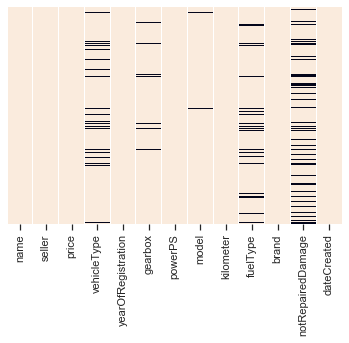

In [247]:
null=autos_clean.isnull()

sns.heatmap(~null, cbar=False, yticklabels=False)

The graph above shows that only the columns vehicle type, gearbox, model, fuel Type and no repaired Damage have missing values. Before fixing it let`s explore other aspects because fixing them would reduce our number of missing values.

The column dateCreated can't be older than YearOfRegistration because it is impossible for a used car to be upload to eBay before its existence. So let's have a look at it.To compare the columns we have to format all the date values into the same date format.

In [248]:
autos_clean['dateCreated']=autos['dateCreated'].str[:4].astype(int) #keep only the first 4 digits that correspond to the year 


In [249]:
olderthancreation=autos_clean[autos_clean['dateCreated']<autos_clean['yearOfRegistration']]#mask registered before its existence 

olderthancreation.shape[0]/autos_clean.shape[0]*100 #percentage 


3.951249973084128

From the above, we can see that 3.95% had its first registration after been posted on eBay and this is illogical. Unfornately there is nothing we can do with these values, so let's delete these rows.

In [250]:
autos_clean=autos_clean[autos_clean['dateCreated']>autos_clean['yearOfRegistration']]

Now that we discarded the cars which were registered too early it is appropriate to also check cars registered too long ago. We need to make a few considerations.
<br>
The first car for mass production was inveted 1908 by  Ford Motor Company.
<br>
For this analysis, we opted to cars after the Fuel injection was implemented in cars in 1980 because it was a mark for the automobile industry. There are many reasons for considering this a mark e.g before it cars had problems starting, especially in cold days.So we are going to consider only cars registered from 1980 onward
<br>
if you are curious about Fuel injection: https://en.wikipedia.org/wiki/Fuel_injection

In [251]:
autos_clean=autos_clean[autos_clean['yearOfRegistration']>=1980]

Lets have a look at the range of prices

In [252]:
autos_clean['price'].describe()

count    3.428670e+05
mean     1.705708e+04
std      3.722661e+06
min      0.000000e+00
25%      1.200000e+03
50%      3.000000e+03
75%      7.490000e+03
max      2.147484e+09
Name: price, dtype: float64

In the Dictionary there is no mention of the currency, but it might be Euros I tried to contact the creator of the dataset, but he hasn't replied.
<br>
There are cars in which the value is 0, and that`s not likely. Doing a research background about the most expensive cars in the world the values are around 2-9 billion dollars, considering that eBay is not a place for ultra-luxury cars.
I will limit the price from 100 Euros to 5 million Euros.

In [253]:
autos_clean=autos_clean[autos_clean.price.between(100, 5*10**6, inclusive=True)] #set price range we want

Now let's have a look in the column notRepairedDamage this column has many missing values according to the graph, but considering its values should be only YES or NO it is worth having a look

In [254]:
autos_clean['notRepairedDamage'].unique()

array([nan, 'ja', 'nein'], dtype=object)

we have 3 values in not Repaired we could assign "nan" and "nein" as NO and "ja" as yes, but a more effective way would be to convert it to bolean values.

In [255]:
yes_no = {"ja": True,"nein": False}

autos_clean['notRepairedDamage']= autos_clean['notRepairedDamage'].map(yes_no) # replaced each row based on yes_no
autos_clean['notRepairedDamage']=autos_clean['notRepairedDamage'].fillna(False) 

In [256]:
autos_clean['notRepairedDamage'].unique()

array([False,  True])

The column vehicle type is special a case. Different from characteristics such as the gearbox, engine power, and fuel type among versions of the same model, the vehicle type is not likely to change. So we can find these values from other rows that are the same model.

In [257]:
not_vehi_type_null=autos_clean[(autos_clean['vehicleType'].notnull()) & (autos_clean['model'].notnull())] 
#row with no missing vehicleType and model

di=dict(zip(not_vehi_type_null.model,not_vehi_type_null['vehicleType']))
#creates a dictionary of models and its vehicle Type

d=autos_clean['vehicleType'].isnull()
# A mark of the values we want to change

autos_clean.loc[d,'vehicleType']=autos_clean['model'][d] 
#setting the missing values in the column vehicle type to match the key of di dictionary

autos_clean=autos_clean.replace({'vehicleType': di})
#replacing the missing values with values from the same model in other rows.

Now that we tried to fix the values it is time to see our progress and then delete the remaining missing values.

Text(0.5, 1, 'After')

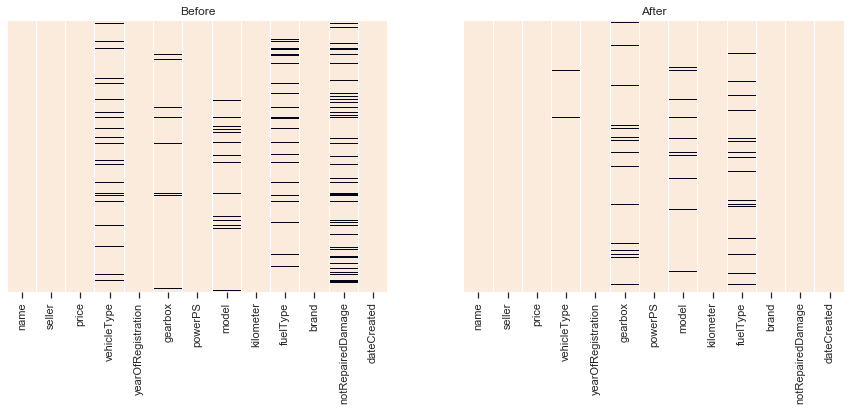

In [258]:
null_update=autos_clean.isnull()
#ploting graphs of missing values before and after our cleaning
fig, ax =plt.subplots(1,2,figsize=(15,5))
sns.heatmap(~null, cbar=False, yticklabels=False,ax=ax[0]).set_title("Before")
sns.heatmap(~null_update, cbar=False, yticklabels=False,ax=ax[1]).set_title("After")


Now we have the relevant data according to the criteria of our analysis, it is time to check whether deleting missing values.

In [259]:
100-(autos_clean.dropna(axis=0).shape[0]/autos_clean.shape[0]*100) #percentage missing data

11.18820363689018

So we would miss 11.18% of our relevant dataset, but because it is still a large dataset we will remove the missing rows.

In [260]:
autos_clean=autos_clean.dropna(axis=0)

**Data exploratory analysis**

The first question we want to answer is which one is the most popular brand and model on eBay.

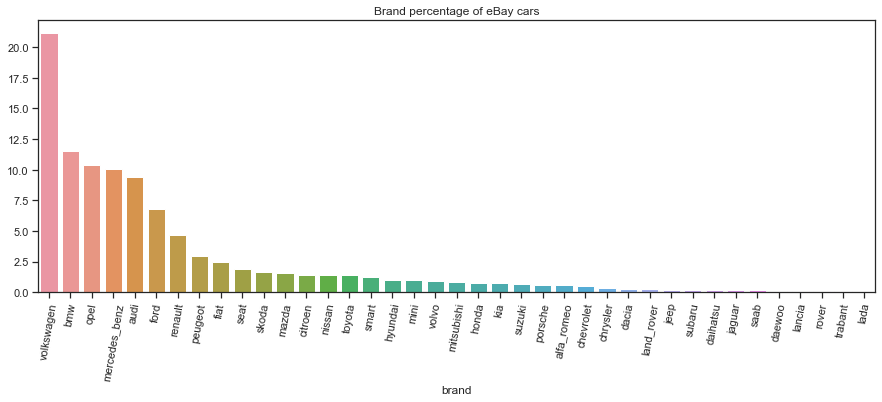

In [261]:
brand=autos_clean.groupby(['brand']).size().sort_values(ascending=False) #separate the dataset by brand
Total_cars=(brand.sum())/100

#plot most popular brands
fig, ax =plt.subplots(figsize=(15,5))
ax.set_title('Brand percentage of eBay cars')
sns.set(font_scale=1.3)
ranking=sns.barplot(x=brand.index, y=brand/Total_cars,)# percentage
ranking=ranking.set_xticklabels(labels=brand.index,rotation=80)





 The first consideration is that Volkswagen has 10% more cars than than the second most popular brand BMW. A second one is that the brands Volkswagen, BMW, Opel, Mercedes Benz,Audi and ford have more cars in eBay than the sum of all other brands. The charactheristic all that the top 5  most popular brands share is that all of them are german companies. The only german company that is not on the top of the list is porsche.

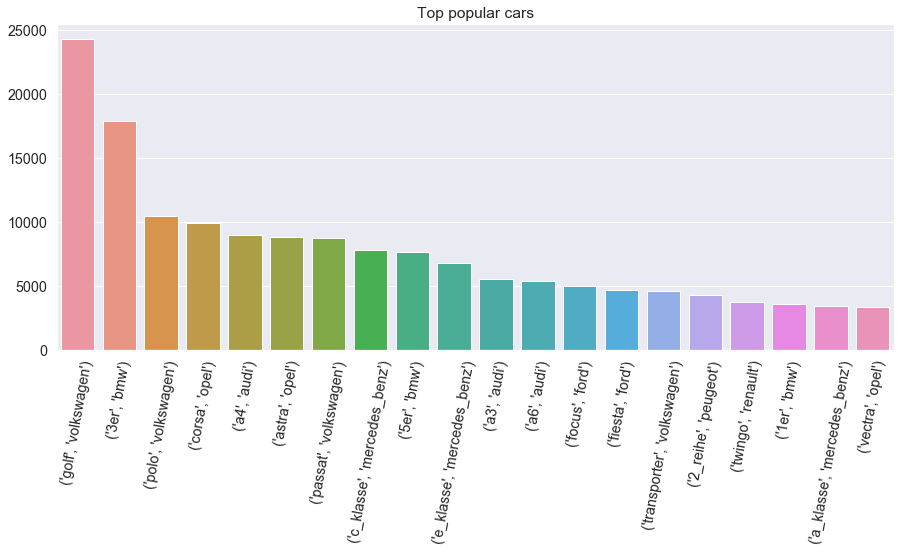

In [262]:
model=autos_clean.groupby(['model','brand']).size().sort_values(ascending=False) #separate by model and brand
model_top20=model[0:20]

#plot most popular cars
fig, ax =plt.subplots(1,1,figsize=(15,6))
sns.set(font_scale=1.3)
ax.set_title('Top popular cars')
t=sns.barplot(x=model_top20.index, y=model_top20).set_xticklabels(labels=model_top20.index,rotation=80)


Not surprisingly the top 10 most popular cars belong to the top 4 four most popular brands. Golf is the most popular car on eBay.Now that we alredy know the most popular brands and cars is time to adress which characterics they have.

From now on we are going only to explore the top 6 most popular brands Volkswagen, BMW, Opel, Mercedes Benz,Audi and ford.


In [263]:
autos_top=autos_clean[(autos_clean['brand']=='volkswagen')|(autos_clean['brand']=='bmw')|(autos_clean['brand']=='opel')|(autos_clean['brand']=='audi')|(autos_clean['brand']=='mercedes_benz')|(autos_clean['brand']=='ford')]


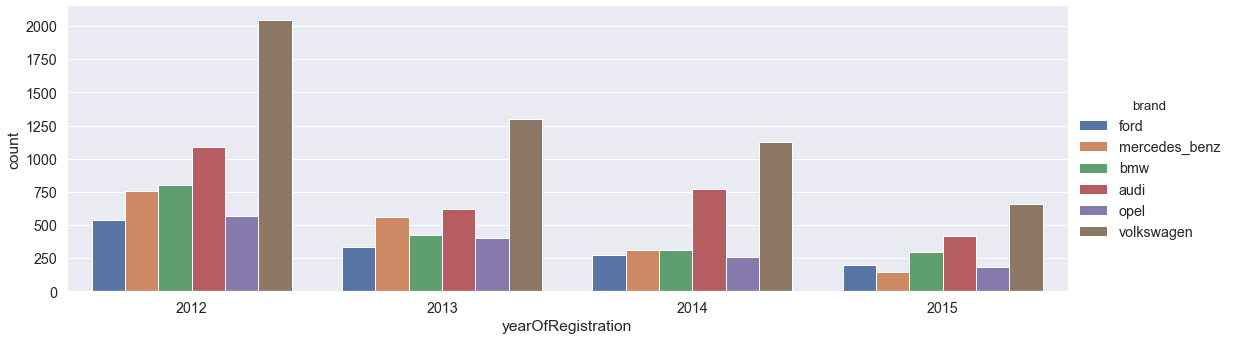

In [267]:
autos_clean_top_=autos_top[autos_top['yearOfRegistration']>2011]

sns.catplot(data=autos_clean_top_,kind='count',x='yearOfRegistration',hue='brand',height=5, # make the plot 5 units high
    aspect=3)

The graph above shows that Volkswage is responsible for the majority per year model in the last 4 years, while bmw has decreased.